# **Weeks 8 and 9: Determing total energy of your own flare**

Welcome to Weeks 8 and 9! During these next two labs, you will be choosing your own flare to analyze from the Space Weather Data Portal and calculating the total energy of the flare. Your lab group has been assigned a flare class--you can find this assignment on [Canvas](https://canvas.colorado.edu/courses/64020/pages/solar-flare-class-assignments). 

Remember, the [X-ray flare classification](https://spaceweather.com/glossary/flareclasses.html) represents the peak irradiance of the flare (as seen for wavelengths within the 1 to 8 $Å$ range) and   includes two parts. First, a letter (A, B, C, M, and X) representing an order of magnitude of the flare, and secondly, a number (1-9) within the specified order. For example, a X3 flare has a peak irradiance of $3 × 10^{-4}$ $W/m^2$; whereas, a M3 flare has ten times lower irradiance. If the flare is larger than an X9 ($9 \times 10^{-4} W/m^2$), then the number is extended beyond 9. For example, a X14 flare has a peak irradiance of $14 × 10^{-4} W/m^2$. 

Today, you will start working on five tasks. You do not have to finish today, as you will finish working on these in week 9, but **you should at least be starting the baseline correction in task 4** by the end of lab today. 

> (1) Go to the Space Weather Data Portal and choose a flare from the [assigned class](https://canvas.colorado.edu/courses/64020/pages/solar-flare-class-assignments). 

> (2) Provide a description of the flare you chose and give the flare a unique name--be creative! 

> (3) Download the data from the flare into a CSV file.

> (4) Use a similar procedure from last weeks lab and modify the code you wrote to determine the total energy of the flare of this flare.

> (5) Document your code using markdown cells and comments to explain your procedure. **Save your colab notebook file as a PDF to turn in by 11pm MT the day after your Week 9 lab.**

> (6*) Bonus: If you finish, find more flares to analyze! 

# **Task 1: Find your solar flare**

Go onto the [Space Weather Data Portal website](https://lasp.colorado.edu/space-weather-portal/) and follow the [tutorial posted on Canvas](https://canvas.colorado.edu/courses/64020/pages/week-8#Tutorial2) to find a flare of the assigned class type that occured during the GOES-15 satellite lifetime (April 2010 - November 2018). 

Choose the flares to help the research project (i.e, not flares that have been previously analyzed in the class such as the Sept. 10th, 2017 flare or the flares from the baseline correction examples colab notebook which occurred on May 5th, 2015, November 11th, 2013 and March 31st, 2011).



# **Task 2: Describe your flare**

[ *Use this markdown file to name your flare and write a description of the flare. Include the date and time (in UCT) of the peak of the flare, the approximate peak height (in $W/m^2$), as well as the subclass (e.g., C5). Then, give a general description of any features of the flare that stand out to you. In particular, please discuss the circumstances of the flares occurance (e.g., was it part of a group of intense solar activitiy or an isolated flare). You may also add graphs or pictures of the flare, links to articles about the flare, etc.* ] 


Flare: Flarimus Maxiumus

Event time: 2017-08-25T07:14:00 to 2017-08-25T09:07:00


Peak irradiance: 5.593380137725035e-06

Sub-class: C5

Features:

Flarimus Masimus appears to be wide and decay more slowly than expected, which might indicate 2 c-class flare events overlapping.

# **Task 3: Download the data**

Download the longwave data from the Space Weather Data Portal website as a .csv file. Make sure to change the time be in ISO units.

# **Task 4: Determine total energy of flare**

Import the XRS longwave data of the solar flare you chose onto your personal computer. You can follow the same procedure that you used in the Week 5 lab.

Execute the code cell below to save the data into the variable "solar_data". Note, you may need to change the file name to match the file you imported into this session. Additionally, if you leave this session you may need to repeat the above steps to import the file again.

In [ ]:
import pandas as pd

# You will need to change the filename
solar_data = pd.read_csv('FlarimusMaximus.csv')     # Import data using pandas library

display(solar_data)       # Display the dataframe of the solar data


,time (yyyy-MM-dd'T'HH:mm:ss),longwave (W/m^2)
0,2017-08-24T23:32:00,1.137720e-07
1,2017-08-24T23:33:00,1.061230e-07
2,2017-08-24T23:34:00,1.041330e-07
3,2017-08-24T23:35:00,1.054650e-07
4,2017-08-24T23:36:00,1.051280e-07
...,...,...
1104,2017-08-25T17:56:00,1.666750e-07
1105,2017-08-25T17:57:00,1.714330e-07
1106,2017-08-25T17:58:00,1.709800e-07
1107,2017-08-25T17:59:00,1.656250e-07


This code cell prints out some relevant time values

In [ ]:
#Print out the empirical start and end times of the flare
print(solar_data["time (yyyy-MM-dd'T'HH:mm:ss)"][462])
print(solar_data["time (yyyy-MM-dd'T'HH:mm:ss)"][575])
print(solar_data["time (yyyy-MM-dd'T'HH:mm:ss)"][maxima_location])

2017-08-25T07:14:00
2017-08-25T09:07:00
2017-08-25T07:27:00


The solar flare data is in the units of solar irradiance ($\frac{W}{m^2}$). As you know by now, the next step is to convert to energy per second ($ergs/s$) and convert time from ISO units to seconds. 

You've done this multiple times before at this point, so we'll just re-use the kind of code you've previously written to do this: 

In [ ]:
import numpy as np
import datetime as dt

# Convert df([time (yyyy-MM-dd'T'HH:mm:ss)]) into elasped time in seconds
dates = [dt.datetime.strptime(date, '%Y-%m-%dT%H:%M:%S') for date in solar_data.iloc[:,0]]
#make a new dataframe in case we want to reference the old one
adjusted_solar_data = solar_data
adjusted_solar_data.iloc[:,0] = [(date - dates[0]).total_seconds() for date in dates]
# Rename dataframe index
adjusted_solar_data = adjusted_solar_data.rename(columns={'time (yyyy-MM-dd\'T\'HH:mm:ss)': 'time (seconds)'}) 

w2erg = 10**7
int_m2 = 4*np.pi*(1.496*10**11)**2 
# Convert units to ergs
adjusted_solar_data['longwave (W/m^2)'] = adjusted_solar_data['longwave (W/m^2)']*w2erg*int_m2  
# Rename dateframe    
adjusted_solar_data = adjusted_solar_data.rename(columns={'longwave (W/m^2)': 'longwave (ergs/s)'}) 

#check that it worked
display(adjusted_solar_data)

,time (seconds),longwave (ergs/s)
0,0.0,3.199694e+23
1,60.0,2.984575e+23
2,120.0,2.928609e+23
3,180.0,2.966070e+23
4,240.0,2.956592e+23
...,...,...
1104,66240.0,4.687524e+23
1105,66300.0,4.821337e+23
1106,66360.0,4.808597e+23
1107,66420.0,4.657994e+23


Next, let's plot the solar flare data as energy per second ($ergs/s$) versus time ($seconds$), so that we can clearly visualize the flare. Again, we've done this before, so we can reuse code:




["time (yyyy-MM-dd'T'HH:mm:ss)", 'longwave (W/m^2)']
5.593380137725035e-06


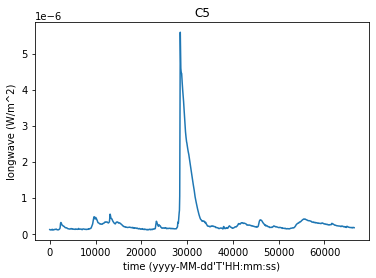

In [ ]:
import matplotlib.pyplot as plt
#chekcing flare is c class by graphing and refercing table
#display column names
print((solar_data.columns.to_list()))
solar_data_columns = solar_data.columns.to_list()
plt.plot(solar_data[solar_data_columns[0]], solar_data[solar_data_columns[1]])
#label graph and title it
plt.xlabel(solar_data_columns[0])
plt.ylabel(solar_data_columns[1])
plt.title("C5")
#print max irradiance
print(max(solar_data[solar_data_columns[1]]))

## Basline correction

As you learned in [Week 7 lecture](https://www.youtube.com/watch?v=XlbRg3e4T9g&feature=youtu.be), one of the primary challenges in determining the total energy of the flare is dealing with the "background." The sun is giving off x-rays even before a flare happens, and we do not want to accidentally include the energy of those x-rays as part of the flare energy. As a result, we need to determine the amount of x-ray power being emitted before the flare (the "baseline") and subtract it from the observed power during the flare to make sure we are only determining the *new* energy created by the flare itself.

Make sure your team has a clear plan for this; refer back to the Week 7 pre-lab lecture, the examples of baseline corrections on the Week 7 Canvas page, or  ask your TA if you need help! 

Hint:
You will want to plot the data from the time period leading up to the flare in order to "see" it clearly and to decide on a strategy. For this part, we don't have to care yet about having time in seconds. In fact, it might be easier to leave time in arbitraty "index" units (i.e., data point 1, data point 2, data point 3, and so on). That way, it will be easy to discuss which data points you want to focus on. For example, maybe you think the pre-flare background is points 4 through 50. Then you can easily access these data points like this:

`solar_data.iloc[4:50,1]`


[*Use this markdown cell to explain how you are doing the baseline correction and the reasoning behind the method you chose. Be as detailed as possible!*]

We were able to find a relatively long and calm time period close to the flare event (from time indices 70 to 150). As such, we used a simple average of a baseline sample to calculate baseline levels.


3.570817288093117e+23


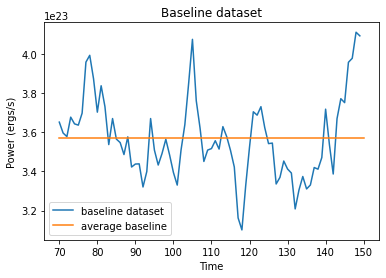

In [ ]:
# You may need the statistics library for determining means and medians
import statistics as stats     
import numpy

# You will need to plot your flare (as shown in the examples of baseline corrections notebook)
# in order to look at the pre-flare data and show the baseline corrected flare
import matplotlib.pyplot as plt

## Write your code here

#make a new dataframe in case we want to reference the old one
preflare_solar_data=adjusted_solar_data[70:150]

#since this dataset is relatively clean, we took a simple average to calculate a baseline.
baseline_average=preflare_solar_data['longwave (ergs/s)'].mean()
print(baseline_average)

#Here, graphically comparing baseline to calculated average
plt.plot(preflare_solar_data.iloc[:,1])
plt.plot([70,150],[baseline_average,baseline_average])
plt.ylabel('Power (ergs/s)')
plt.xlabel('Time')
plt.title("Baseline dataset")
plt.legend(["baseline dataset","average baseline"])


plt.show()

## Reporting total energy

Once you have determined the baseline and subtracted this "background," you are ready to determine the total flare energy. Last week, we did this for a practice flare using a function we called `integrate.trapz`. Use this same function to compute the total energy of your new flare, referring back to your work last week if you need to.

Note: As several of our teams learned last week, this function is a little tricky! Make sure to use the appropiate limits for integration by indexing the `x` and `y` variables. You also have to tell it both the y-data AND the x-data to get the integration right (by default, it integrates assuming the x-coordinates are 1, 2, 3, 4, etc.) Be careful with that this week!


[*Use this markdown cell to describe how you are computing the total energy produced by the flare.*] 

Using the data available, we used combinations of Rieman sums in order to over- and underestimate the energy of the flare. In addition, we used python’s function trapz in order to take a trapezoidal sum of the data. 
To make these error bounds, we assume that the flare is increasing until the maximum and then decreasing until the end of the event.

In [ ]:
#Import the integrate function; we will use trapezoidal integradion ('integrate.trapz')
import scipy.integrate as integrate

## Write your code here

#make a new dataframe in case we want to reference the old one
corrected_solar_data=adjusted_solar_data
#do baseline correction
corrected_solar_data['longwave (ergs/s)']=corrected_solar_data['longwave (ergs/s)']-baseline_average

#experimentally determined time start and stop indices for the solar flare event
n_start=462
n_stop=575

# Calculate these for data analysis later
time_step=corrected_solar_data['time (seconds)'][1]-corrected_solar_data['time (seconds)'][0]
maxima_location = corrected_solar_data['longwave (ergs/s)'][n_start:].idxmax()

# this code finds a lower bound with 2 riemann sums:
lower_bound = sum(corrected_solar_data['longwave (ergs/s)'][n_start:maxima_location-1]*time_step) + sum(corrected_solar_data['longwave (ergs/s)'][maxima_location+1:n_stop]*time_step)
print("Lower bound (ergs): ", lower_bound)

# trapz numerically integrates with trapezoids
estimate = integrate.trapz(corrected_solar_data['longwave (ergs/s)'][n_start:n_stop],corrected_solar_data['time (seconds)'][n_start:n_stop])
print("Estimate (ergs):    ", estimate)

# this code finds an upper bound with 2 riemann sums:
upper_bound = sum(corrected_solar_data['longwave (ergs/s)'][n_start+1:maxima_location]*time_step) + sum(corrected_solar_data['longwave (ergs/s)'][maxima_location:n_stop]*time_step)
print("Upper bound (ergs): ", upper_bound)
print()

Lower bound (ergs):  2.5470782177760256e+28
Estimate (ergs):     2.6873925854342353e+28
Upper bound (ergs):  2.6878756865862604e+28



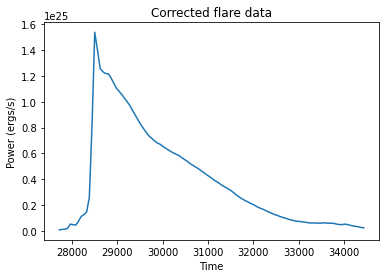

In [ ]:
n_zoom=462
n_zoom2=575

#here, a happly little graph of the baseline-corrected flare event
plt.plot(corrected_solar_data['time (seconds)'][n_zoom:n_zoom2], corrected_solar_data['longwave (ergs/s)'][n_zoom:n_zoom2])
#plt.plot([0,1050],[0,0])
plt.ylabel('Power (ergs/s)')
plt.xlabel('Time')
plt.title("Corrected flare data")


plt.show()



Note! As you may know, every measurement in experimental physics is subject to some  ***uncertainty***. The flare energy is no different-- we don't have time to figure out the uncertainty this week, but we will definitely need to do that before reporting out final results.

# **Task 5: Comment, save, and submit**

* Comment your code.

* Double-check all your code cells have been executed. 

* Save this file as a PDF, click Print. In the printer dialog box select "Save as PDF" as your destination and click "Save".  

* Double-check that you can see all of the executed code cells, tables, and graphs in the PDF. **IF YOU ARE HAVING TROUBLE PRINTING TO A PDF, PLEASE RUN THE CODE CELL AT THE END OF THE COLAB NOTEBOOK.**

* In this Goolge Colab notebook, click on "Share" in the upper right-hand corner of the window. 

<img src=https://i.pinimg.com/originals/8f/c5/ee/8fc5ee91627c0353febe142ff9adde82.png
 width="250">   

* Under "Get Link" click on "Change". Change the "Share" settings so that anyone with the link and be a commenter. 

 <img src=https://i.pinimg.com/originals/83/d5/a0/83d5a060a21b96208814e85a6761693a.png
 width="500">

 <img src=https://i.pinimg.com/originals/66/5e/94/665e943a4a0ee20a965f6c89b86f6e47.png
 width="300">

* In Canvas, upload the PDF file as an assignment and copy and paste the link to this notebook as the comment.


## Need help converting your colab notebook to a PDF?

The following code cell will covert your colab notebook to a PDF. 

>(1) You will need to first **change the filename** to the name the colab notebook you would like to convert. For example, your colab file for Week 8 and 9 is likely to be called `'Week8and9_DetermingTotalEnergyofFlare.ipynb'`. 

> (2) You will need to mount your google drive. If your drive is not mounted already, the code cell will prompt you with the steps to do this as it runs.

> (3) The PDF will be saved to the same folder as this code cell. You can then download the PDF from google drive and upload it onto Canvas.

> (4) If you run into an error saying that the "list index is out of range" try two fixes:
>> - First, make sure your filename is correct
>> - Move your Colab notebook into the main area of the drive instead of having it in a folder.

In [ ]:
################################################################################
#                    CODE TO CONVERT COLAB NOTEBOOK TO PDF                     #
#This code converts an .ipynb file to a Tex based PDF and saves it in the Colab#
#Notebook folder with the same filename.pdf                                    #
################################################################################

# Please change the file name to the name of your colab notebook
filename = 'Week8and9_DetermingTotalEnergyofFlare.ipynb' # Ex. 'Coding_Packet.ipynb'

from google.colab import drive
drive.mount('/content/gdrive', force_remount = True) # This is done first-
#- because we need a temporal delay between mounting and calling
#Install some dependences into the RUNTIME (is not local, needs to reinstall-
#- every runtime)
!echo 'Installing pips. This may take a few minutes.'
!pip install IPython >> outputsuppressed.txt
!pip install Latex >> outputsuppressed.txt
!pip install pandoc >> outputsuppressed.txt
!pip install nbconvert >> outputsuppressed.txt
!pip install jupyter >> outputsuppressed.txt

#Well known Ubuntu Tex library
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> outputsuppressed.txt

# Searches the Google drive directory for the filename and gives back it's location
#(This accounts for Wildcards and Spaces in the directory names)
#Uses jupyter and nbconvert to convert the ipynb file to a Tex file, then into a
#pdf

!IFS=$'\n' #Sets the reader to only break at newlines instead of spaces,tabs,and newlines
!echo 'Finding file. This may take a minute or two depending on the size of your drive'
loc= !find '/content/gdrive' -name "{filename}"
fileloc = loc[0]
!jupyter nbconvert --to pdf "{fileloc}"

from datetime import datetime
import random 
now = datetime.now()
print('\n', now.strftime("%d/%m/%Y %H:%M:%S"), random.randrange(1000000, 9999999, 1))

# The PDF will be in the same folder as the original file
!echo "";echo "Conversion Complete. The pdf will be in the same location as your .ipynb file";echo "";echo "Have a Nice Day!"

############ Version:
# Created by Thomas Horning
# Last Update: 2020-09-25, 12:49 pm - Thomas Horning
#  - Moved Dev Notes to Markdown Cell
#  - Created Version Log
#  - Added completion response 

##

KeyboardInterrupt: ignored

## **Task 6*: Find more flares!**

If time allows, choose another flare from C through X class! Follow the same procedure from above to report the total energy of the flare.

As before, make sure to provide a detailed description of the flares, which includes the date and time (in UCT) of the peak of the flare, as well as the subclass (e.g., C5.3) and other descriptive information. 